In [1]:
import numpy as np
import pandas as pd
import scienceplots
import matplotlib.pyplot as plt
from datasets import load_dataset, concatenate_datasets
from itertools import combinations, product
from huggingface_hub import login as hf_login
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
ds = load_dataset("beanham/spatial_union_dataset")
train=ds['train']
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)
train_pd=train.to_pandas()

## Angle Degrees

In [22]:
name='min_angle'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 0.2534106510876768
Mean: 8.173721970442841
Max: 89.99142574384204
STD: 20.47682558738981


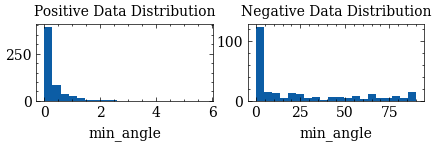

In [6]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(5,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Data Distribution', fontsize=title_size)
plt.xlabel(name)
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Data Distribution', fontsize=title_size)
plt.xlabel(name)
#plt.savefig(f"../../misc/{name}_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

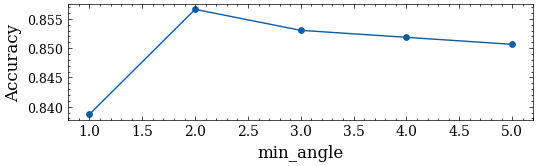

In [23]:
metrics=[1,2,3,4,5]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train[name])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
#plt.title('Parallelism Heuristic')
#plt.ylim(top=0.95, bottom=0.85)
plt.yticks(fontsize=9)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('min_angle', fontsize=12)
#plt.legend()
#plt.savefig(f"../../misc/{name}_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    

---

## Max Area

In [24]:
name='max_area'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.04663239549739347
Median: 0.9554050531812308
Mean: 0.7464377419605231
Max: 0.9997474675972201
STD: 0.31809474912618424


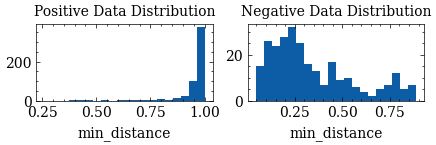

In [25]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(5,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Data Distribution', fontsize=title_size)
plt.xlabel('min_distance')
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Data Distribution', fontsize=title_size)
plt.xlabel('min_distance')
#plt.savefig(f"../../misc/min_distance_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

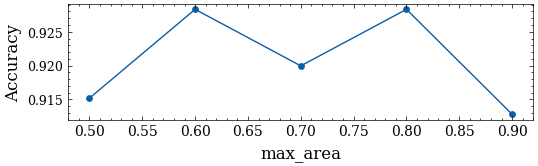

In [32]:
metrics=[0.5,0.6,0.7,0.8,0.9]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train[name])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
#plt.title('Parallelism Heuristic')
#plt.ylim(top=0.95, bottom=0.85)
plt.yticks(fontsize=9)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('max_area', fontsize=12)
#plt.legend()
#plt.savefig(f"../../misc/{name}_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    